In [17]:
import pandas as pd


df_carwale = pd.read_csv("ev_reviews/4-wheeler-EV-carwale.csv")
df_cardekho = pd.read_csv("ev_reviews/4-wheeler-EV-cardekho.csv")


df_carwale = df_carwale.rename(columns={"review": "Review", "model_name": "Model"})
df_cardekho = df_cardekho.rename(columns={"Review": "Review", "Model": "Model"})


df_reviews = pd.concat([df_carwale[['Review', 'Model']], df_cardekho[['Review', 'Model']]], ignore_index=True)
df_reviews.dropna(inplace=True)


df_market = pd.read_csv("global_ev/Global EV 2023.csv")


df_iea = pd.read_csv("iea_ev_data.csv")


print("Reviews:")
print(df_reviews.head())

print("\n Global Market Data:")
print(df_market.head())

print("\n IEA Data:")
print(df_iea.head())


Reviews:
                                              Review         Model
0  Superb car like as fantastic as petroleum car....  hyundai kona
1  Anti national, worst service, worst customer c...  hyundai kona
2           Super happy with it. The car is too good  hyundai kona
3  Pretty good car, smooth as a glider fast car, ...  hyundai kona
4  Price difference between petrol and electronic...  hyundai kona

 Global Market Data:
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical  EV stock share  Cars         EV  2011   percent   
3  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00650  
2    0.00046  
3   49.00000  
4  170.00000  

 IEA Data:
  

In [18]:

print(" Dataset Summary:")
df_reviews.info()


print("\n Missing values:")
print(df_reviews.isnull().sum())


df_reviews['Review Length'] = df_reviews['Review'].str.len()
print("\n Review Length Stats:")
print(df_reviews['Review Length'].describe())


print("\n Reviews per EV model:")
print(df_reviews['Model'].value_counts())




 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  269 non-null    object
 1   Model   269 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB

 Missing values:
Review    0
Model     0
dtype: int64

 Review Length Stats:
count     269.000000
mean      254.293680
std       179.011921
min        40.000000
25%       146.000000
50%       200.000000
75%       343.000000
max      1861.000000
Name: Review Length, dtype: float64

 Reviews per EV model:
Model
tata nexon ev    75
Tata Nexon EV    74
hyundai kona     56
tata tigor ev    20
Tata Tigor EV    15
Kia EV6          12
MG ZS EV         12
BYD E6            5
Name: count, dtype: int64


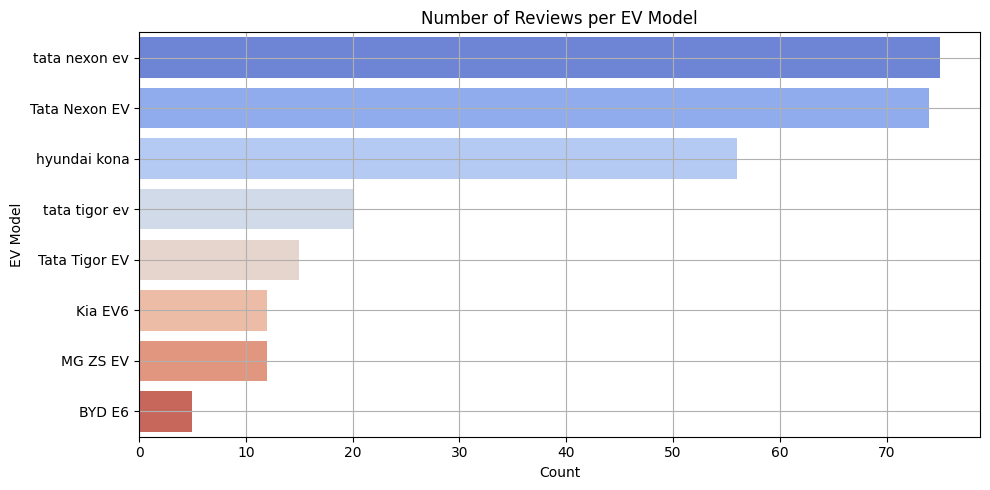

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(y='Model', data=df_reviews, order=df_reviews['Model'].value_counts().index, palette="coolwarm")
plt.title("Number of Reviews per EV Model")
plt.xlabel("Count")
plt.ylabel("EV Model")
plt.grid(True)
plt.tight_layout()
plt.show()


 Regions in dataset: 38
 Powertrain types: ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']

 Data range: 2010 to 2030


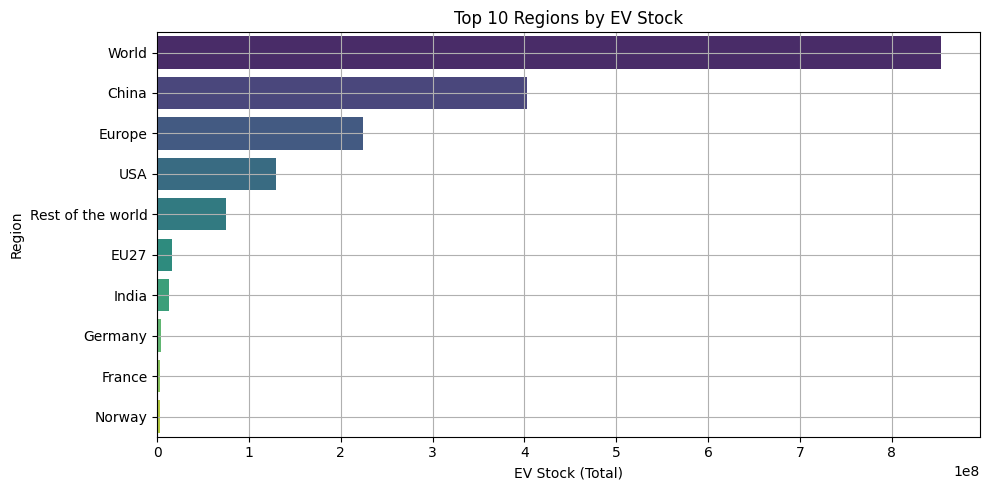

In [20]:

print("\n Regions in dataset:", df_market['region'].nunique())
print(" Powertrain types:", df_market['powertrain'].unique())


print("\n Data range:", df_market['year'].min(), "to", df_market['year'].max())


stock = df_market[(df_market['parameter'] == 'EV stock') & (df_market['unit'] == 'Vehicles')]
top_regions = stock.groupby('region')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title("Top 10 Regions by EV Stock")
plt.xlabel("EV Stock (Total)")
plt.ylabel("Region")
plt.grid(True)
plt.tight_layout()
plt.show()



 IEA dataset coverage:
Regions: 61
Parameters: ['EV sales' 'EV stock' 'EV sales share' 'EV stock share'
 'Oil displacement Mbd' 'Oil displacement, million lge' 'Battery demand']
Years: 2010 - 2024


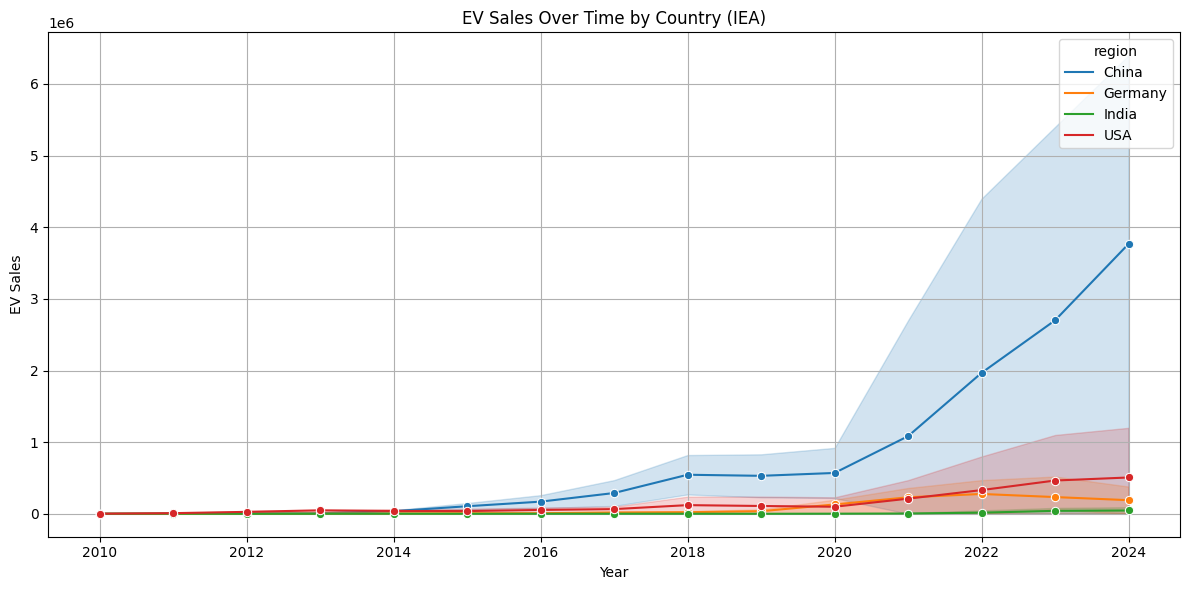

In [21]:

print("\n IEA dataset coverage:")
print("Regions:", df_iea['region'].nunique())
print("Parameters:", df_iea['parameter'].unique())
print("Years:", df_iea['year'].min(), "-", df_iea['year'].max())


selected_countries = ['USA', 'China', 'India', 'Germany']
iea_ev_sales = df_iea[(df_iea['parameter'] == 'EV sales') & (df_iea['region'].isin(selected_countries))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=iea_ev_sales, x='year', y='value', hue='region', marker='o')
plt.title("EV Sales Over Time by Country (IEA)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
